<center><font size=6>Bank Customer Churn Prediction</font></center>

!['Bank desk image'](bank-image.jpg)

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip install --upgrade tensorflow numpy --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 985.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 1.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Dropout, BatchNormalization

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score, f1_score,accuracy_score, precision_score, r2_score

import random
# Time related functions.
import time

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSML/UnivTex/Project Folder/Project 4: Bank Churn/Churn.csv")

## Data Overview

In [ ]:
# view a sample of the rows
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
955,956,15571002,Yusupov,706,France,Female,44,4,129605.99,1,0,0,69865.49,0
6615,6616,15792934,Carruthers,661,France,Male,26,8,0.00,2,0,0,196875.87,0
593,594,15775153,Buchi,630,Spain,Male,32,4,82034.00,1,0,0,146326.45,0
7579,7580,15649101,Reeves,601,France,Male,40,10,127847.86,1,0,0,173245.68,0
5718,5719,15814519,Kamdibe,648,France,Female,37,7,0.00,2,1,0,194238.92,0
3125,3126,15685346,Chu,736,Spain,Female,26,4,135889.13,1,1,1,165692.03,0
4798,4799,15627377,Sabbatini,593,France,Male,41,6,0.00,2,1,1,99136.49,0
5968,5969,15603743,Tai,526,France,Male,28,1,112070.44,1,0,1,126281.83,0
1489,1490,15617705,Ozioma,609,France,Female,39,8,141675.23,1,0,1,175664.25,0
6450,6451,15781409,Lazarev,834,France,Female,28,6,0.00,1,1,0,74287.53,0


#### Data Shape

In [ ]:
# what is the shape of the data
df.shape

(10000, 14)

#### Column data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations:**

- There are 10,000 rows and 14 columns
- There are 3 object types
- There are 9 int64 and 2 float64

In [ ]:
# statistical summary object columns
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 30)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
******************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
******************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
******************************


In [ ]:
# check summary for numeric columns
for i in df.describe(include=["int64", 'float64']).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 30)

Unique values in RowNumber are :
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
******************************
Unique values in CustomerId are :
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64
******************************
Unique values in CreditScore are :
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
******************************
Unique values in Age are :
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
******************************
Unique values in Tenure are :
Tenure
2     10

#### Statistical Summary

In [ ]:
# statistical summary of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
# statistical summary for object features
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


#### Missing value check

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Drop unnecessary columns

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

#### Univariate Utility functions

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Credit Score Univariate Analysis

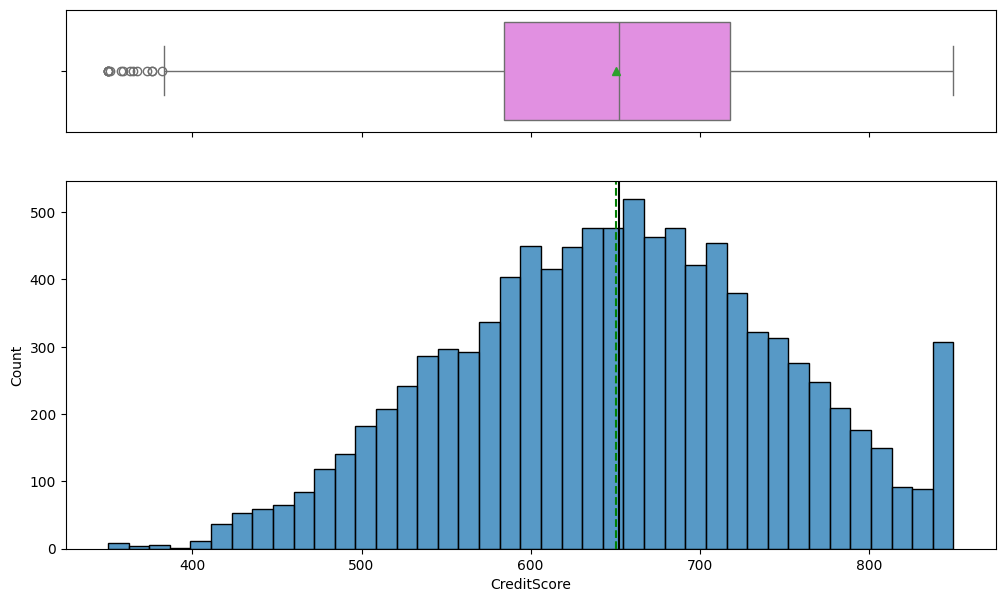

In [ ]:
# what does the Credit score data look like
histogram_boxplot(df, 'CreditScore')

In [ ]:
# credit score summary
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

#### Age Univariate Analysis

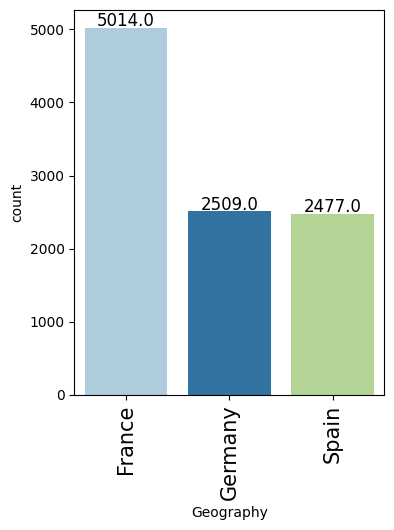

In [ ]:
# what does the geography data look like
labeled_barplot(df, 'Geography', perc=False, n=None)

In [ ]:
df['Geography'].value_counts(normalize=True)

Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

#### Gender Univariate Analysis

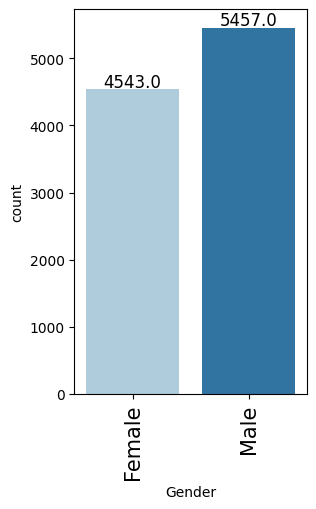

In [ ]:
# what does the gender data look like
labeled_barplot(df, 'Gender', perc=False, n=None)

In [ ]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

#### Age Univariate Analysis

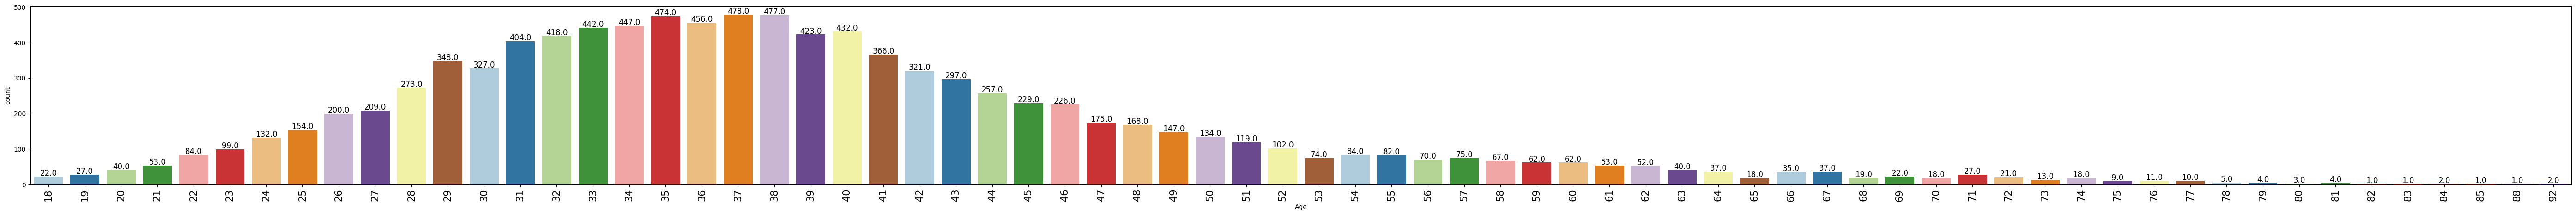

In [ ]:
# what does the age data look like
labeled_barplot(df, 'Age', perc=False, n=None)

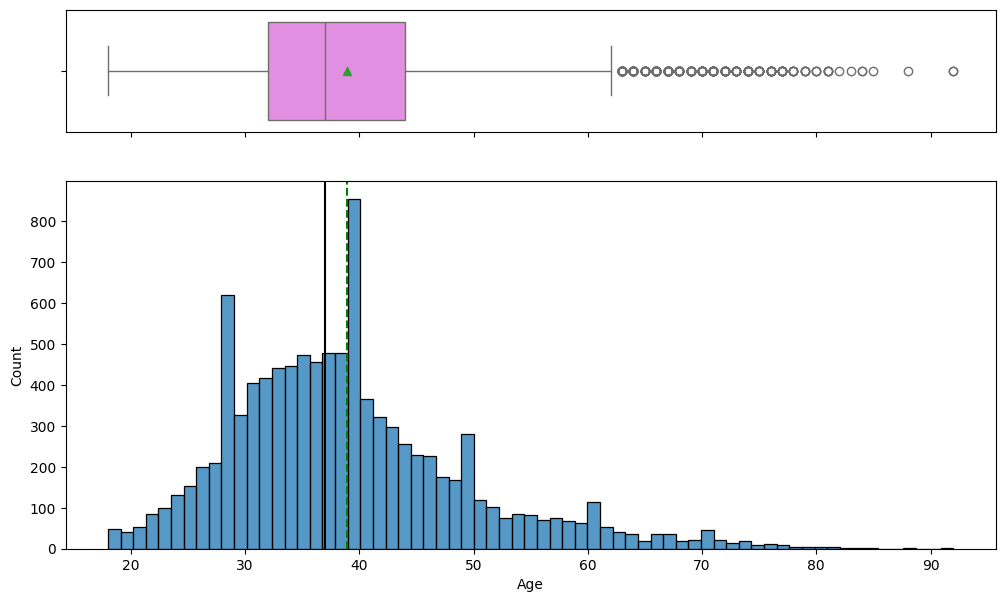

In [ ]:
# what does the age data look like
histogram_boxplot(df, 'Age')

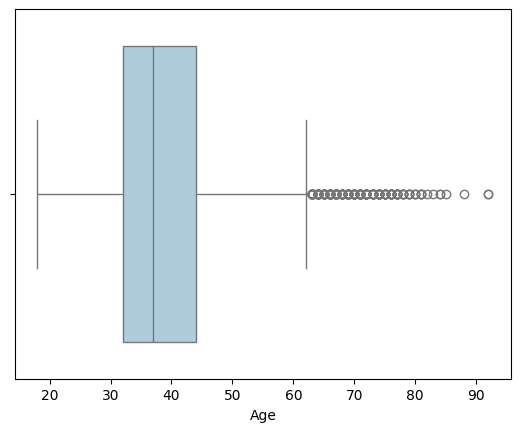

In [ ]:

sns.boxplot(data=df, x='Age', palette='Paired')
plt.show()

#### Tenure Univariate Analysis

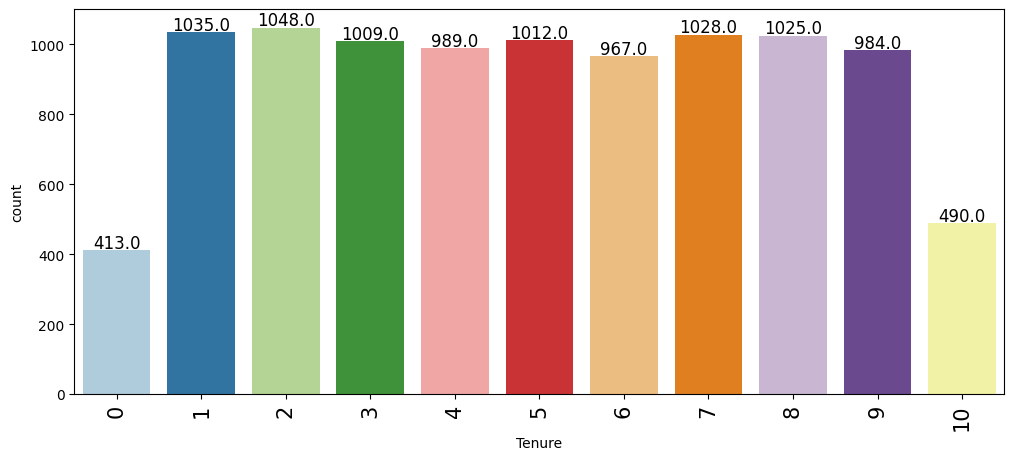

In [ ]:
# what does the tenure data look like
labeled_barplot(df, 'Tenure', perc=False, n=None)

In [ ]:
df['Tenure'].value_counts(normalize=True)

Tenure
2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: proportion, dtype: float64

#### Balance Univariate Analysis

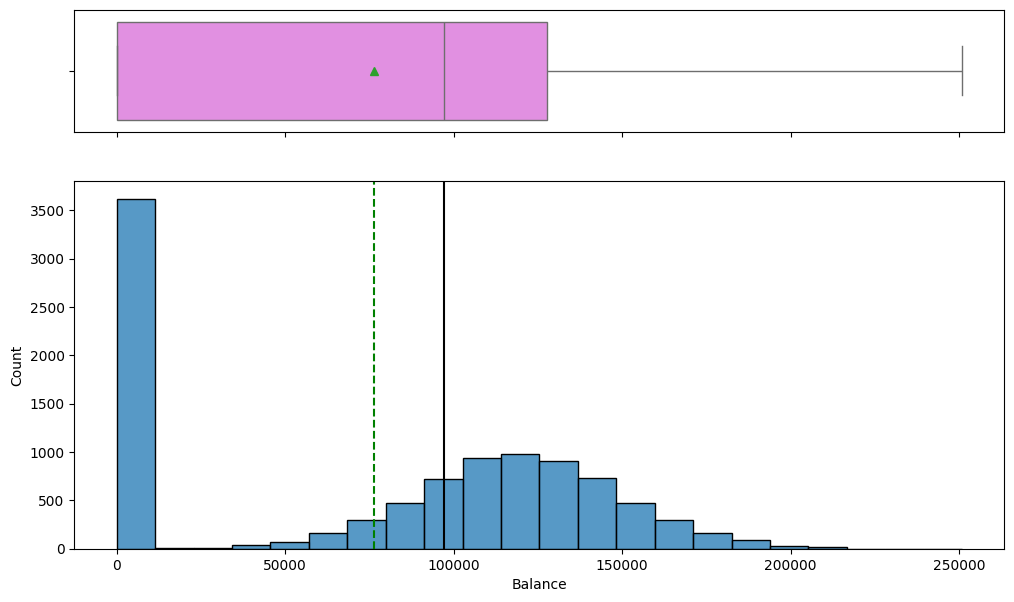

In [ ]:
# what does the balance data look like
histogram_boxplot(df, 'Balance')

#### Number of Products Univariate Analysis

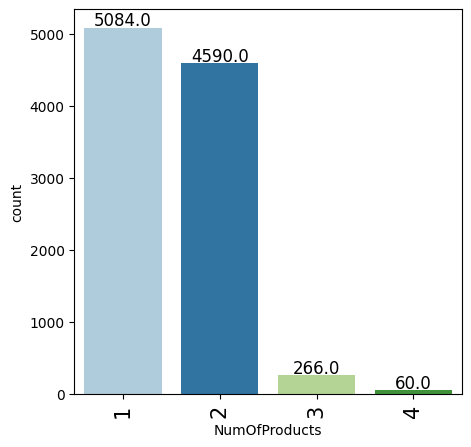

In [ ]:
# what does the products data look like
labeled_barplot(df, 'NumOfProducts', perc=False, n=None)

In [ ]:
df['NumOfProducts'].value_counts(normalize=True)

NumOfProducts
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: proportion, dtype: float64

#### Has a Credit Card Univariate Analysis

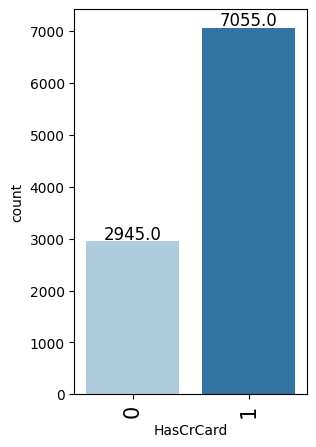

In [ ]:
# what does the credit card data look like
labeled_barplot(df, 'HasCrCard', perc=False, n=None)

#### Is an Active Member Univariate Analysis

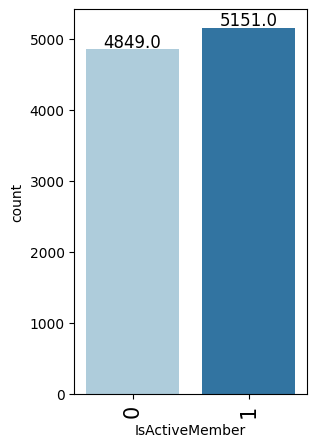

In [ ]:
# what does the active member data look like
labeled_barplot(df, 'IsActiveMember', perc=False, n=None)

#### Estimated Salary Univariate Analysis

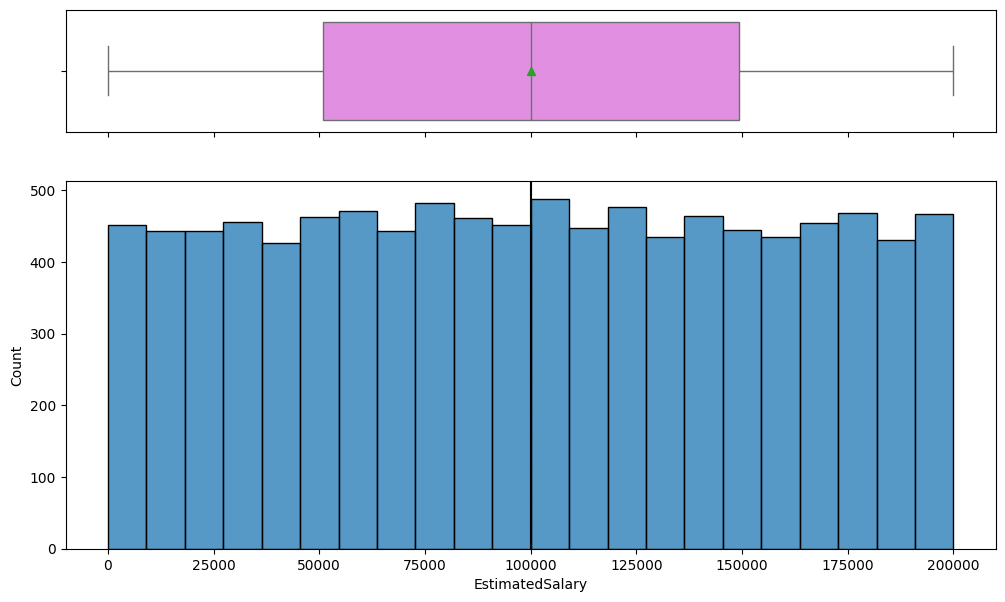

In [ ]:
# what does the salary data look like
histogram_boxplot(df, 'EstimatedSalary')

#### Exited Univariate Analysis

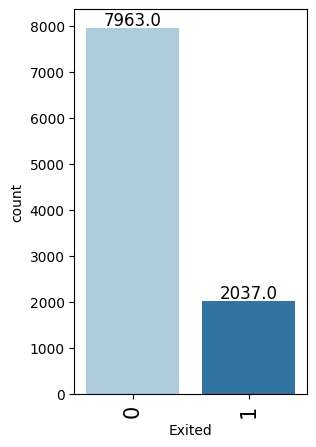

In [ ]:
# what does the exited data look like
labeled_barplot(df, 'Exited', perc=False, n=None)

### Bivariate Analysis

#### Bivariate Analysis Utility Functions

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation between features

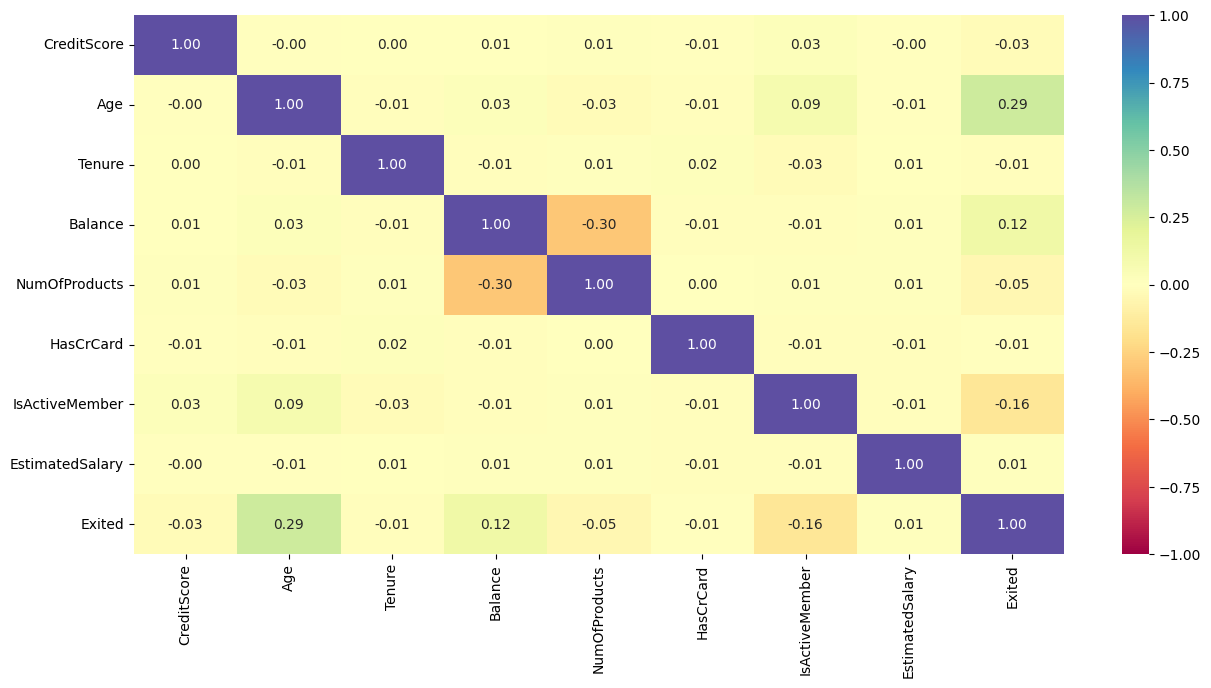

In [ ]:
# plot the correlation between attributes
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

#### Exited and Credit Score Analysis

Exited:

- 0 = No the customer did not leave the bank
- 1 = Yes the customer left the bank

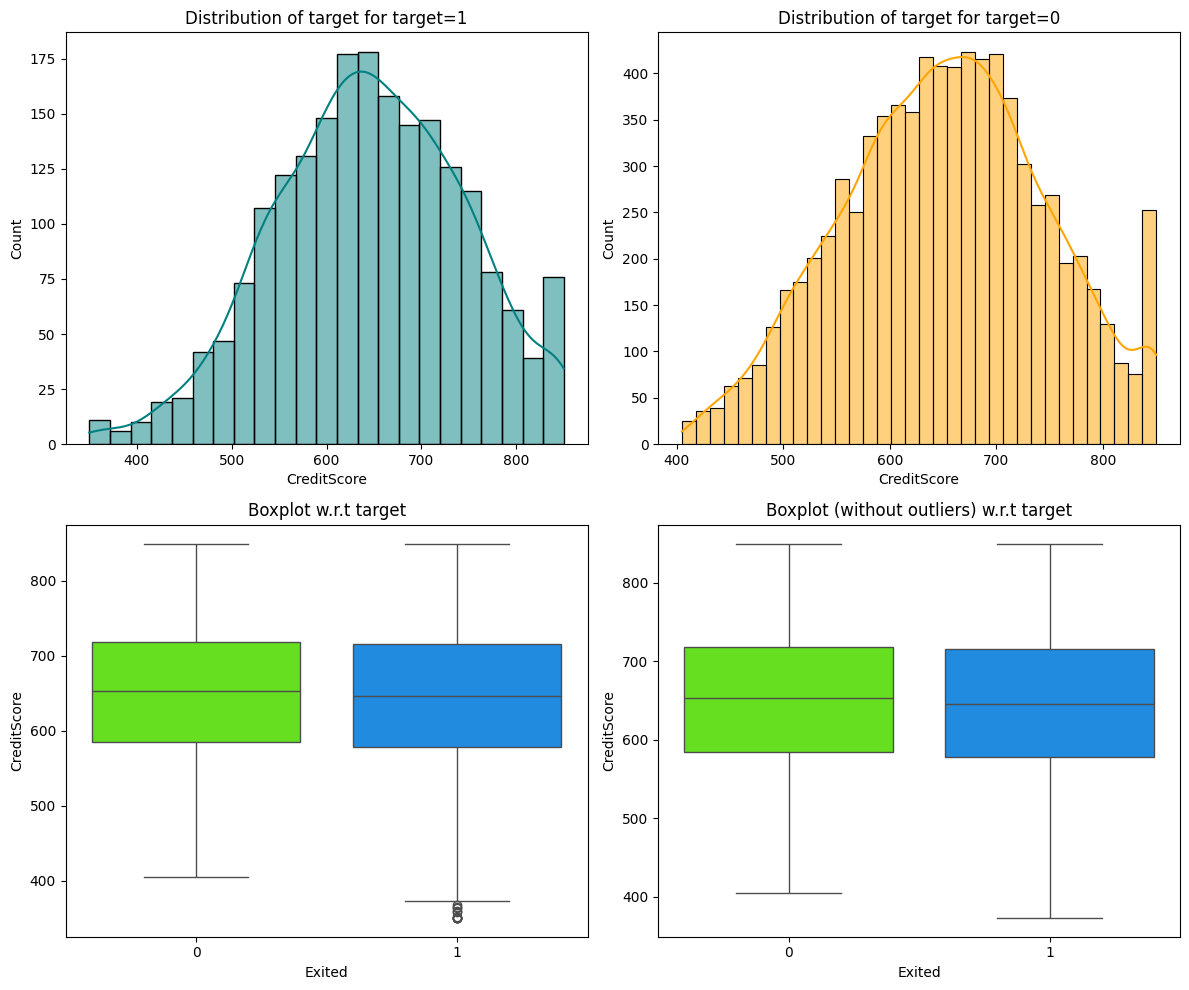

In [ ]:
distribution_plot_wrt_target(df, "CreditScore", "Exited")

In [ ]:
# average credit score of some who has left the bank
df[df['Exited'] == 1]['CreditScore'].mean()

645.3514972999509

In [ ]:
# average credit score current customer
df[df['Exited'] == 0]['CreditScore'].mean()

651.8531960316463

**Observations:**

There seems to be very little correlation between credit score and whether someone choses to leave the bank

#### Exited and Geography Anlysis

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


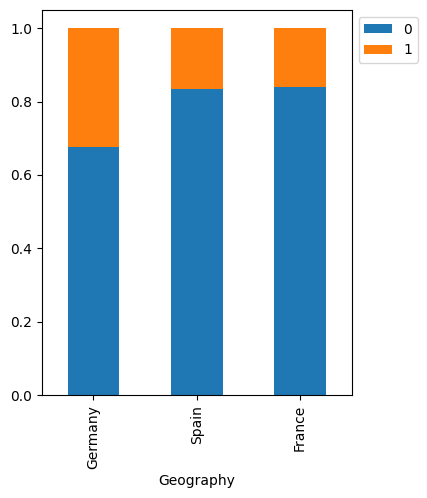

In [ ]:
# visualize the relationship between geography and exit
stacked_barplot(df, "Geography", "Exited" )

In [ ]:
# what is the exit counts per country
df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


**Observations:**

- 32% of German customers leave the bank.
- 16% of French customers leave the bank.
- 17% of Spanish customers leave the bank.

#### Exited and Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


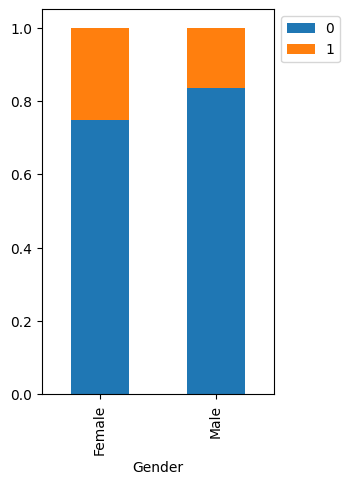

In [ ]:
# visualize the relationship between gender and exit
stacked_barplot(df, "Gender", "Exited" )

In [ ]:
# what is the exit counts per country
df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


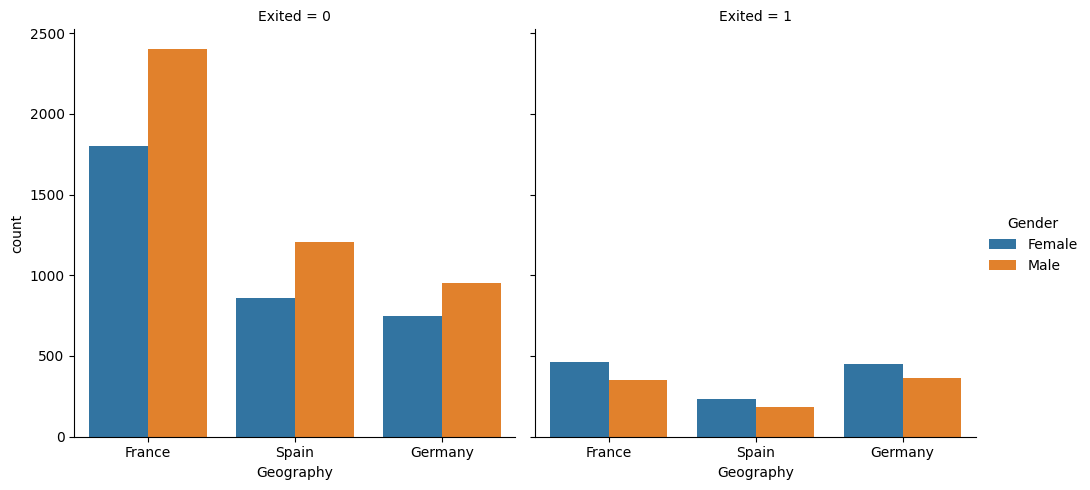

In [ ]:
sns.catplot(x="Geography", hue="Gender", col="Exited", data=df, kind="count")
plt.show()

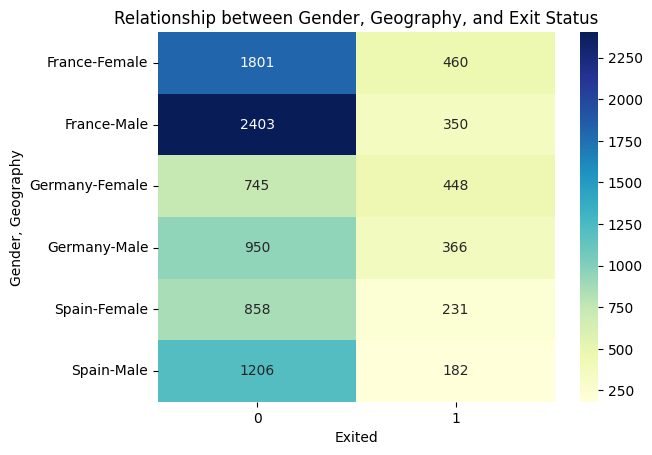

In [ ]:
correlation_matrix = df.groupby(['Geography', 'Gender', 'Exited']).size().unstack(fill_value=0)
sns.heatmap(correlation_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Exited')
plt.ylabel('Gender, Geography')
plt.title('Relationship between Gender, Geography, and Exit Status')
plt.show()

In [ ]:
total_counts = df.groupby(['Geography', 'Gender', 'Exited']).size().unstack(fill_value=0)
total_counts['Total'] = total_counts.sum(axis=1)
total_counts

Exited               0    1  Total
Geography Gender                  
France    Female  1801  460   2261
          Male    2403  350   2753
Germany   Female   745  448   1193
          Male     950  366   1316
Spain     Female   858  231   1089
          Male    1206  182   1388

**Observations:**

- 25% of all female customers leave the bank.
- 16% of all male customers leave the bank.
- Women are more likely to leave the bank in all 3 countries than men.

#### Exited and Age Analysis

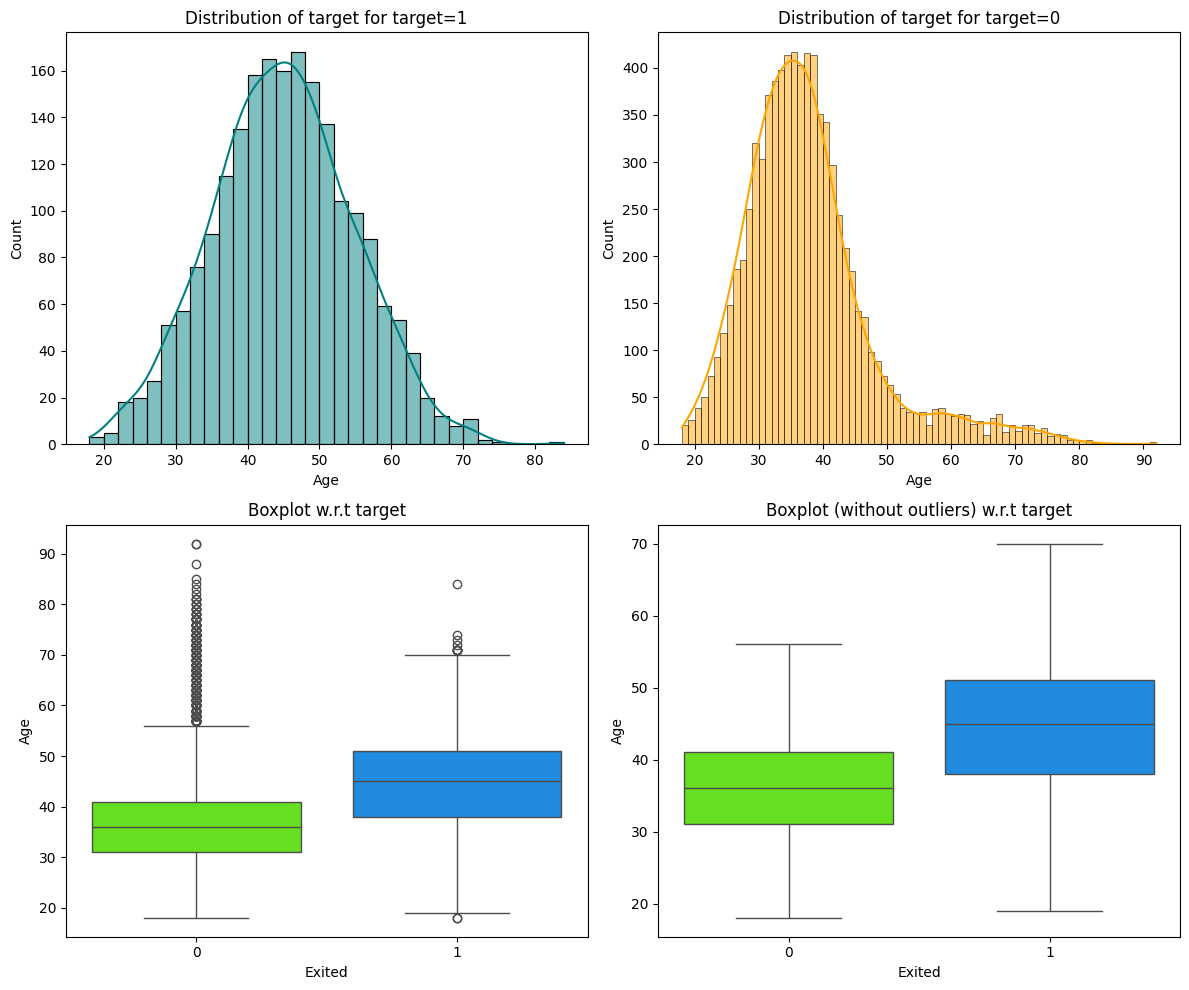

In [ ]:
distribution_plot_wrt_target(df, "Age", "Exited")

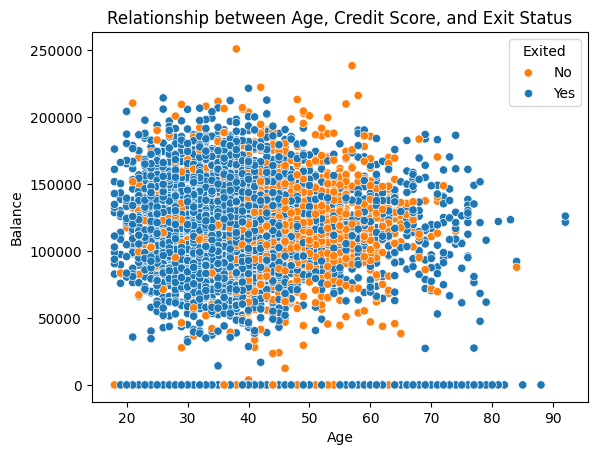

In [ ]:
# scatterplot with age hued with Exited
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited')
plt.title('Relationship between Age, Credit Score, and Exit Status')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

#### Exited and Tenure Anlysis

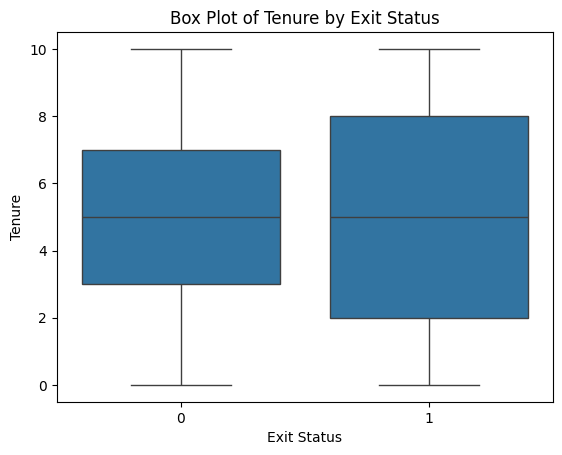

In [ ]:
sns.boxplot(data=df, x='Exited', y='Tenure')
plt.xlabel('Exit Status')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure by Exit Status')
plt.show()

In [ ]:
# what is the average Tenure value with Exited  = 1
df[df['Exited'] == 1]['Tenure'].mean()

4.932744231713304

#### Exited and Balance Analysis

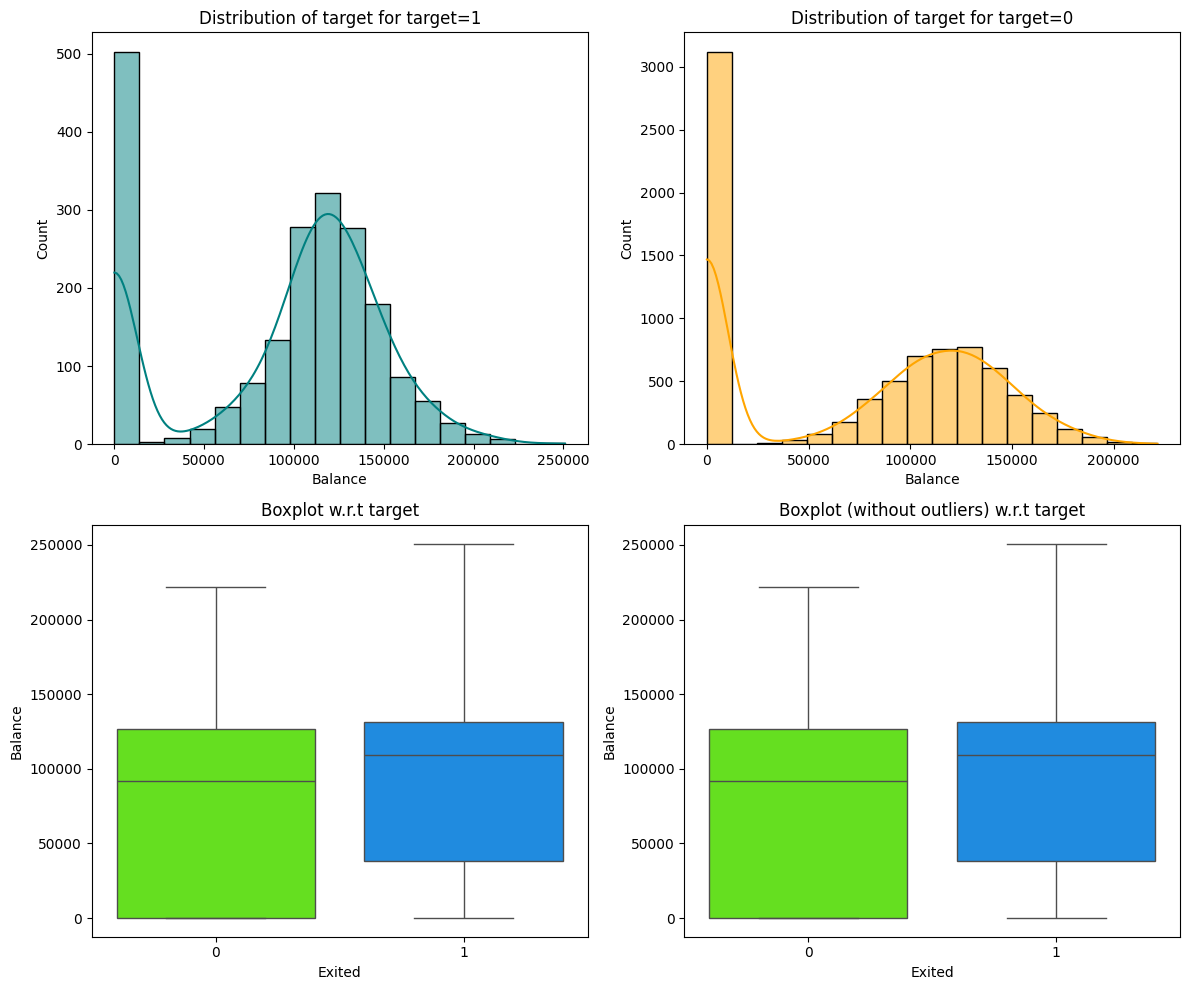

In [ ]:
distribution_plot_wrt_target(df, "Balance", "Exited")

#### Exited and Number of Products Anlysis

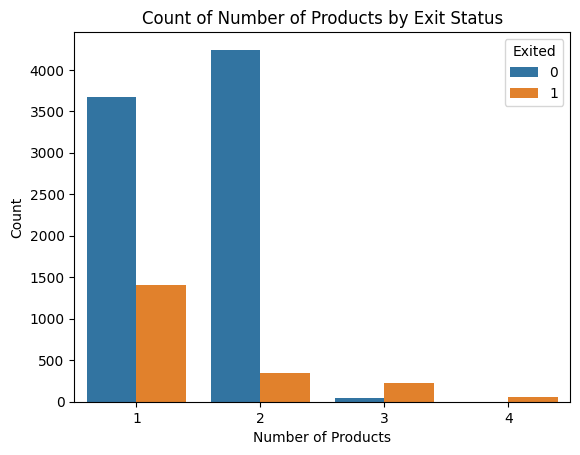

In [ ]:
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Count of Number of Products by Exit Status')
plt.show()

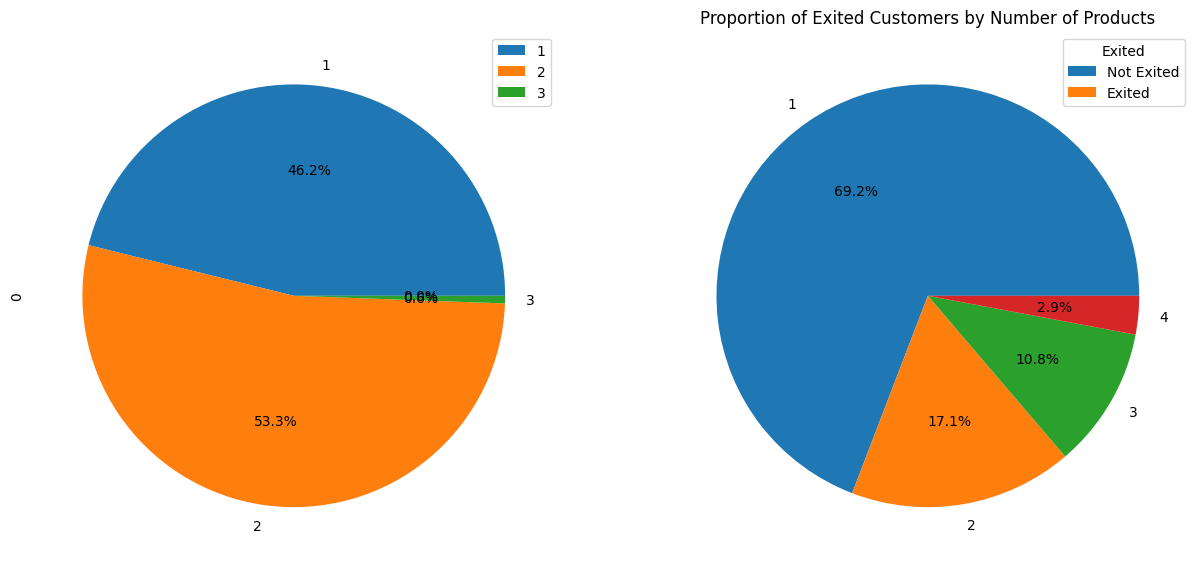

In [ ]:
exited_counts = df.groupby('NumOfProducts')['Exited'].value_counts().unstack(fill_value=0)
exited_counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(15, 10))
plt.title('Proportion of Exited Customers by Number of Products')
plt.ylabel('')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()

**Observations:**

- Customers with 1-2 total products have the smallest attrition rate.
- Customers with 4-5 products have the highest attrition rate

#### Exited and Credit Card Analysis

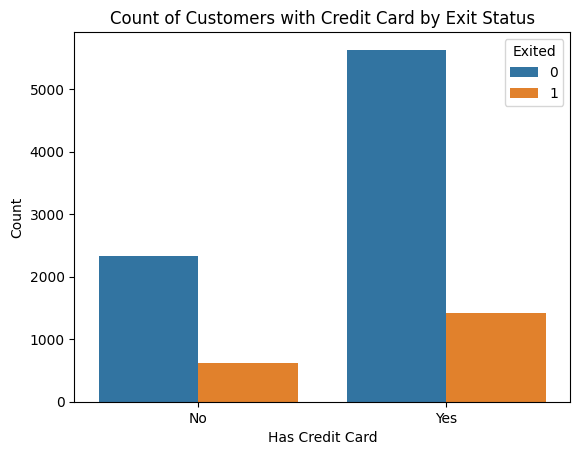

In [ ]:
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Count of Customers with Credit Card by Exit Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [ ]:
# what are the value counts for HasCrCard and Exited
df.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


**Observations:**

- Customers with who currently hold credit cards have higher overall rates of churn than those that don't.

However, by category:

- Customers without a credit card are 6% more likely to churn than customers with a credit card.

#### Exited and Active Status Anlysis

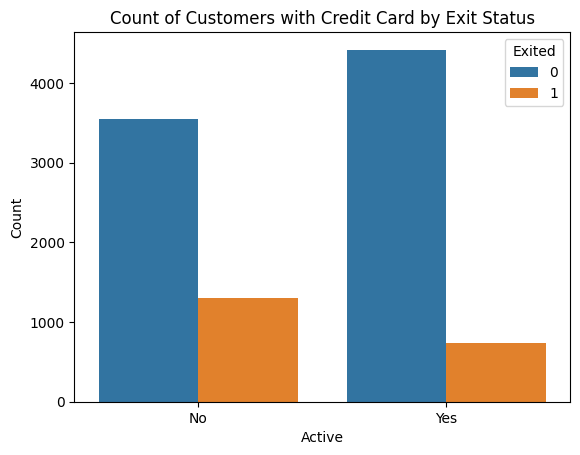

In [ ]:
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.xlabel('Active')
plt.ylabel('Count')
plt.title('Count of Customers with Credit Card by Exit Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [ ]:
# what are the value counts for HasCrCard and Exited
df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


**Observations:**

- Active customers are 13% less likely to churn.
- 27% of inactive customers churn

#### Exited and Estimated Salary Analysis

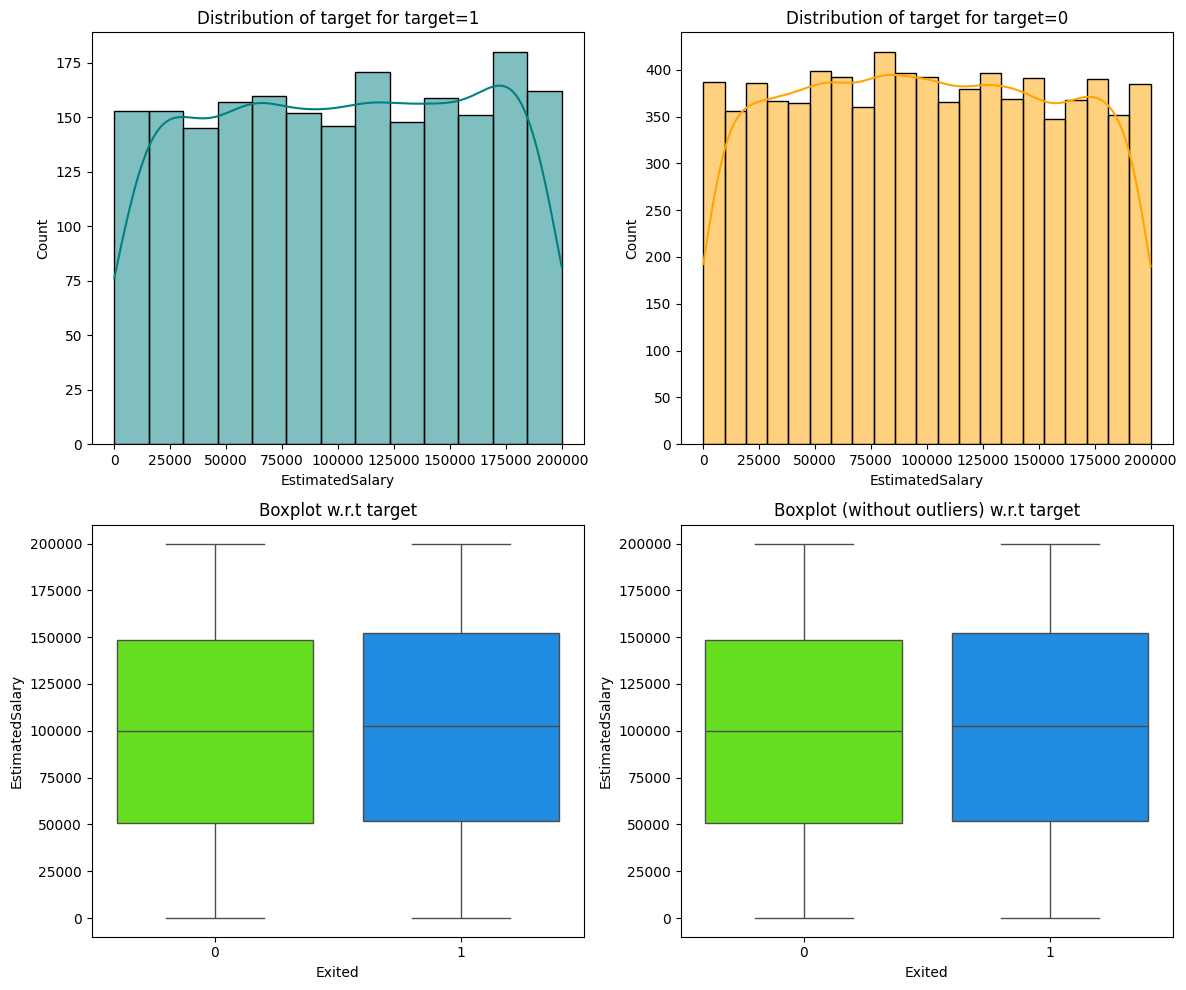

In [ ]:
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

**Observations:**

- Estimated Salary versus Exited has a pretty uniform distribution. It doesn't appear to have a correlation to customer churn

## Data Preprocessing

In [ ]:
# predictors: Credit Score through Estimated Salary
X = df.drop(['Exited'],axis=1)
y = df['Exited'] # target

### Train-validation-test Split

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, shuffle= True, random_state=1, stratify=y)

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=1, stratify=y_temp, shuffle=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6800, 10) (1700, 10) (1500, 10)


### Dummy Variable Creation

In [ ]:
X_train = pd.get_dummies(X_train, columns=['Geography', 'Gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Geography', 'Gender'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['Geography', 'Gender'], drop_first=True)

### Data Normalization

In [ ]:
# columns to normalize
norm_cols= ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# create an instance of standard scaler
sc = StandardScaler()

# fit_transform X_train, transfomr val & test
X_train[norm_cols] = sc.fit_transform(X_train[norm_cols])
X_val[norm_cols] = sc.transform(X_val[norm_cols])
X_test[norm_cols] = sc.transform(X_test[norm_cols])

In [ ]:
# Checking class balance for whole data, train set, validation set, and test set
print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 30)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 30)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 30)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 30)

Target value ratio in y
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64
******************************
Target value ratio in y_train
Exited
0    0.796324
1    0.203676
Name: proportion, dtype: float64
******************************
Target value ratio in y_val
Exited
0    0.796471
1    0.203529
Name: proportion, dtype: float64
******************************
Target value ratio in y_test
Exited
0    0.796
1    0.204
Name: proportion, dtype: float64
******************************


## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**
* Predicting a customer will stay when they don't.
* Predicting a customer will leave when they will stay.


**Which metric to optimize?**

Customers’ leaving  services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their  services in the next 6 months and reason for same – so that bank could improve upon those areas

Minimizing false negatives will be most important, as we want to identify those who are most likely to churn
-


As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

#### Confusion Matrix function

In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf


We'll create a dataframe to store the results from all the models we build

## Model 0

### Neural Network with SGD Optimizer

In [ ]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [ ]:
# number of rows in each batch
batch_size = 64
# number of iterations
epochs = 25

In [ ]:
# always clear the session before any model
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [ ]:
metric = keras.metrics.Recall()

In [ ]:
# instantiate Sequential
model0 = Sequential()
# input layer with 64 nodes and relu
model0.add(Dense(64, activation= 'relu', input_dim = X_train.shape[1]))
# 1st hidden layer with 64 nodes and tanh
model0.add(Dense(32, activation= 'tanh'))
# output layer with
model0.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001, momentum=0.5)
model0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6068 - recall: 0.1368 - val_loss: 0.5487 - val_recall: 0.0376
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5459 - recall: 0.0294 - val_loss: 0.5179 - val_recall: 0.0116
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5208 - recall: 0.0114 - val_loss: 0.5028 - val_recall: 0.0029
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5080 - recall: 0.0023 - val_loss: 0.4938 - val_recall: 0.0029
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5001 - recall: 6.9650e-04 - val_loss: 0.4873 - val_recall: 0.0000e+00
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4942 - recall: 0.0000e+00 - val_loss: 0.4821 - val_recall: 0.0000e+00
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4894 - recall: 0.0000e+00 - val_loss: 0.4776 - val_recall: 0.0000e+00
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4852 - recall: 0.0000e+00 - val_loss: 0.4736 -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.325255155563354


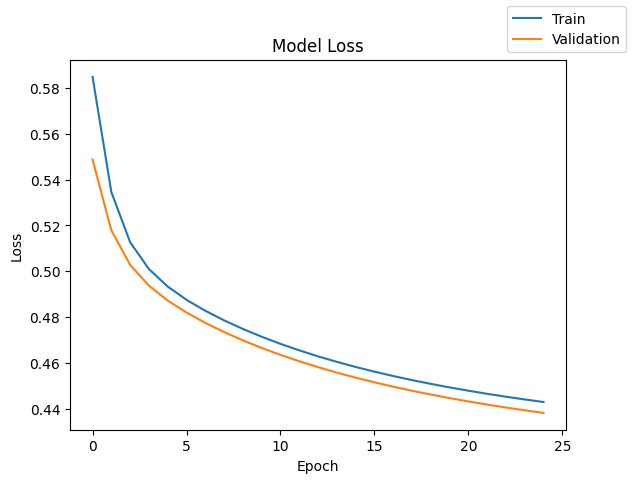

In [ ]:
plot(history,'loss')

#### Base 0 Performance

In [ ]:
# weighted train performance
model0_train_perf = model_performance_classification(model0, X_train, y_train)
model0_train_perf

213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.798088,0.798088,0.749973,0.728739


In [ ]:
# weighted validation performance
model0_val_perf = model_performance_classification(model0, X_val, y_val)
model0_val_perf

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.797059,0.797059,0.744524,0.726478


#### Model 0 Confusion Matrix

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


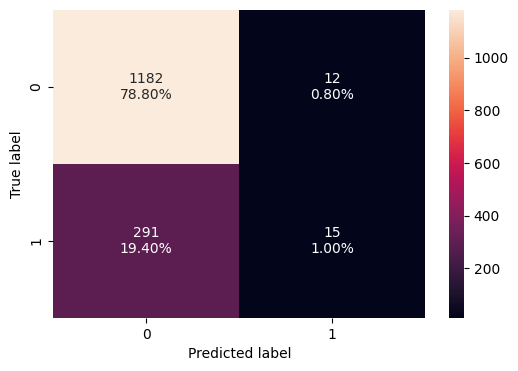

In [ ]:
# confusion matrix for validation
y_pred = model0.predict(X_test) > 0.5
make_confusion_matrix(y_test, y_pred)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


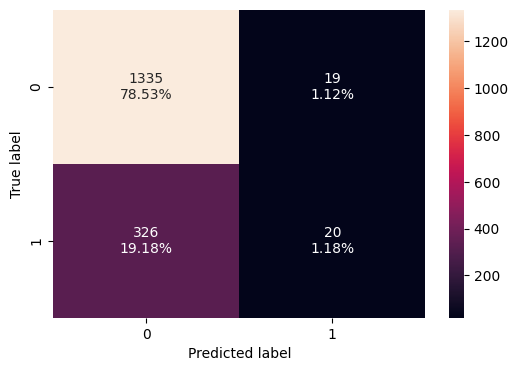

In [ ]:
# confusion matrix for validation
y_pred = model0.predict(X_val) > 0.5
make_confusion_matrix(y_val, y_pred)


## Neural Network with Adam Optimizer

### Model 1

In [ ]:
# always clear the session before any model
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# instantiate the neural network
model1 = Sequential()
# input layer with 64 nodes and relu
model1.add(Dense(64, activation= 'relu', input_dim = X_train.shape[1]))
# 1st hidden layer with 32 nodes and tanh
model1.add(Dense(32, activation= 'tanh'))
# output layer with
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
metric = keras.metrics.Recall()

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5000 - recall: 0.0431 - val_loss: 0.4192 - val_recall: 0.1879
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4298 - recall: 0.2111 - val_loss: 0.4066 - val_recall: 0.2572
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4197 - recall: 0.2560 - val_loss: 0.3984 - val_recall: 0.2832
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4115 - recall: 0.2839 - val_loss: 0.3905 - val_recall: 0.3092
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4032 - recall: 0.3084 - val_loss: 0.3829 - val_recall: 0.3324
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3951 - recall: 0.3348 - val_loss: 0.3760 - val_recall: 0.3671
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3874 - recall: 0.3443 - val_loss: 0.3696 - val_recall: 0.3960
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3805 - recall: 0.3719 - val_loss: 0.3642 - val_recall: 0.4104
Epoch 9/

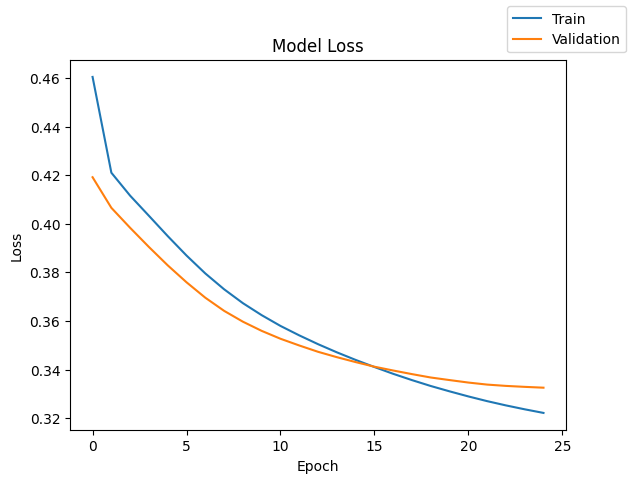

In [ ]:
plot(history,'loss')

#### Model 1 Performance

In [ ]:
# Weighted train performance
model1_train_perf = model_performance_classification(model1, X_train, y_train)
model1_train_perf

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.866912,0.866912,0.858775,0.85955


In [ ]:
# Weighted validation performance
model1_val_perf = model_performance_classification(model1, X_val, y_val)
model1_val_perf

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.852941,0.852941,0.843318,0.845439


#### Model 1 Confusion Matrix

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


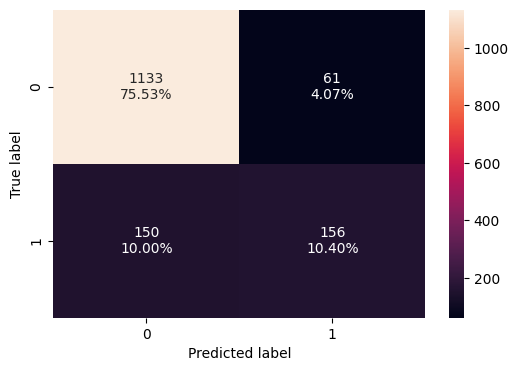

In [ ]:
# confusion matrix for test
y_pred = model1.predict(X_test) > 0.5
make_confusion_matrix(y_test, y_pred)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


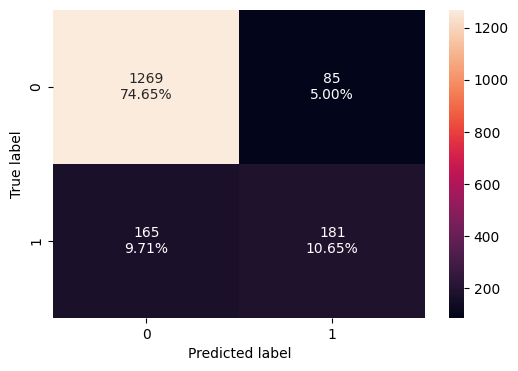

In [ ]:
# confusion matrix for validation
y_pred = model1.predict(X_val) > 0.5
make_confusion_matrix(y_val, y_pred)

## Neural Network with Adam Optimizer and Dropout

### Model 2

In [ ]:
# always clear the session before any model
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Initializing the neural network
model2 = Sequential()
# input layer with 64 nodes and relu
model2.add(Dense(64, activation= 'relu', input_dim = X_train.shape[1]))
model2.add(Dropout(0.2))
# 1st hidden layer with 32 nodes and tanh
model2.add(Dense(32, activation= 'tanh'))
# 2nd hidden layer with 16 nodes and tanh
model2.add(Dense(16, activation= 'tanh'))
model2.add(Dropout(0.1))
# 3rd hidden layer with 16 nodes and
model2.add(Dense(16, activation='tanh'))
# output layer
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
metric = keras.metrics.Recall()

In [ ]:
# set Adam optimizer
optimizer = tf.keras.optimizers.Adam()
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
# Summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,665 (14.32 KB)

 Trainable params: 3,665 (14.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3225 - recall: 0.5137 - val_loss: 0.3323 - val_recall: 0.5289
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3211 - recall: 0.5160 - val_loss: 0.3319 - val_recall: 0.5289
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3198 - recall: 0.5159 - val_loss: 0.3319 - val_recall: 0.5347
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3186 - recall: 0.5165 - val_loss: 0.3319 - val_recall: 0.5347
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3176 - recall: 0.5203 - val_loss: 0.3321 - val_recall: 0.5347
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3166 - recall: 0.5246 - val_loss: 0.3321 - val_recall: 0.5347
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3157 - recall: 0.5304 - val_loss: 0.3324 - val_recall: 0.5376
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3147 - recall: 0.5317 - val_loss: 0.3326 - val_recall: 0.5376
Epoch 9/

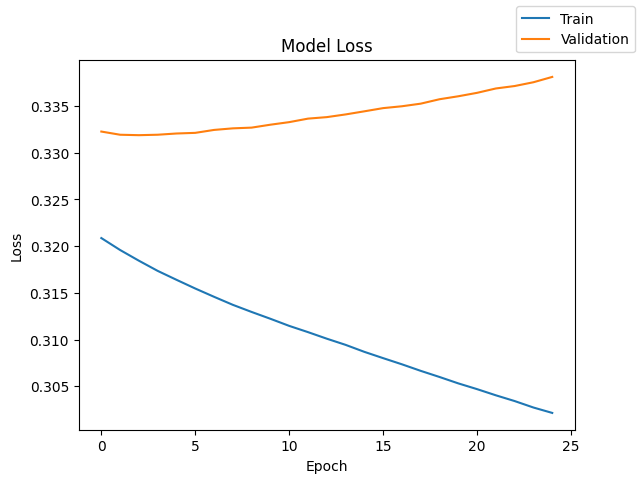

In [ ]:
plot(history,'loss')

#### Model 2 Performance

In [ ]:
# Weighted train performance
model2_train_perf = model_performance_classification(model2, X_train, y_train)
model2_train_perf

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.780294,0.780294,0.672221,0.706128


In [ ]:
# Weighted validation performance
model2_val_perf = model_performance_classification(model2, X_val, y_val)
model2_val_perf

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.781176,0.781176,0.669436,0.705549


#### Confusion Matrix

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


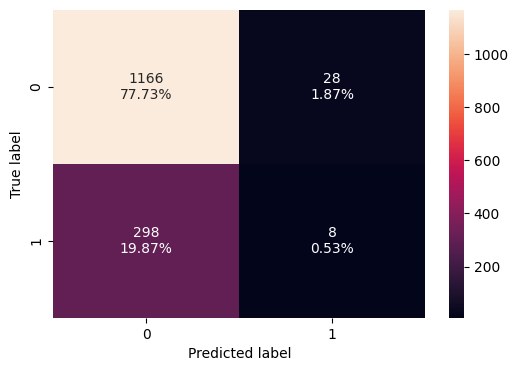

In [ ]:
# confusion matrix for test
y_pred = model2.predict(X_test) > 0.5
make_confusion_matrix(y_test, y_pred)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


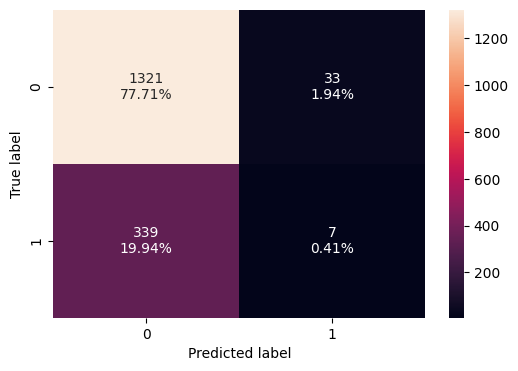

In [ ]:
# confusion matrix for validation
y_pred = model2.predict(X_val) > 0.5
make_confusion_matrix(y_val, y_pred)

## Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

### Model 3

In [ ]:
# instantiate SMOTE
sm = SMOTE(random_state = 1)

In [ ]:
# resample X and y
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10830, 11)
After UpSampling, the shape of train_y: (10830,) 



In [ ]:
# always clear the session before any model
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [ ]:
# instantiate Sequential
model3 = Sequential()
# input layer with 128 nodes and relu
model3.add(Dense(128, activation= 'relu', input_dim = X_train.shape[1]))
# 1st hidden layer with 64 nodes and tanh
model3.add(Dense(64, activation= 'tanh'))
# 2nd hidden layer with 32 notes and tanh
model3.add(Dense(32, activation= 'relu'))
# output layer with
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
metric = keras.metrics.Recall()

In [ ]:
# don't forget to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.01, momentum=0.9)
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= [metric])

In [ ]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model3.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6116 - recall: 0.6797 - val_loss: 0.5125 - val_recall: 0.6561
Epoch 2/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5142 - recall: 0.7341 - val_loss: 0.4752 - val_recall: 0.5954
Epoch 3/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4867 - recall: 0.7514 - val_loss: 0.4491 - val_recall: 0.5896
Epoch 4/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4641 - recall: 0.7717 - val_loss: 0.4471 - val_recall: 0.6532
Epoch 5/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4447 - recall: 0.7859 - val_loss: 0.4415 - val_recall: 0.6792
Epoch 6/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4289 - recall: 0.7917 - val_loss: 0.4295 - val_recall: 0.6965
Epoch 7/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4170 - recall: 0.7933 - val_loss: 0.4250 - val_recall: 0.6994
Epoch 8/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4074 - recall: 0.7990 - val_loss: 0.4243 - val_recall: 0.7081
Epoch 9/

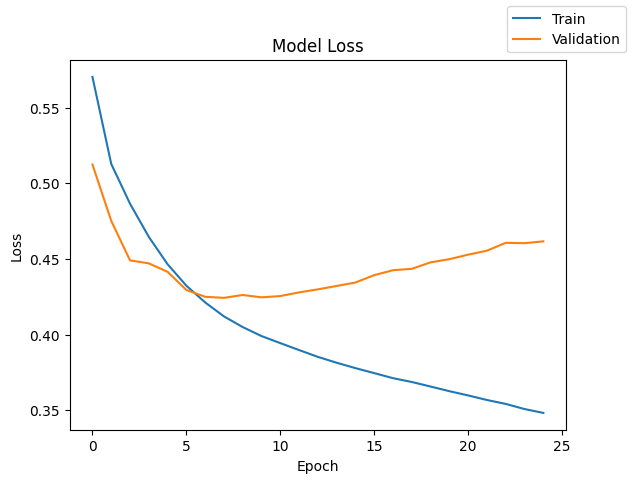

In [ ]:
plot(history,'loss')

#### Model 3 Performance

In [ ]:
# model 3 training performance Weighted
model3_train_perf = model_performance_classification(model3, X_train_smote, y_train_smote)
model3_train_perf

339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.852262,0.852262,0.854891,0.851988


In [ ]:
# model 3 validation performance Weighted
model3_val_perf = model_performance_classification(model3, X_val, y_val)
model3_val_perf

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.785294,0.785294,0.830347,0.799546


#### Confusion Matrix

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


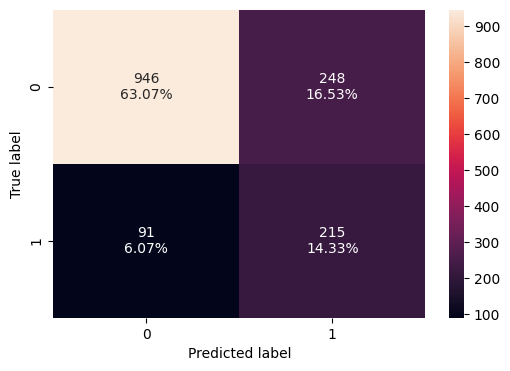

In [ ]:
# confusion matrix for test
y_pred = model3.predict(X_test) > 0.5
make_confusion_matrix(y_test, y_pred)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


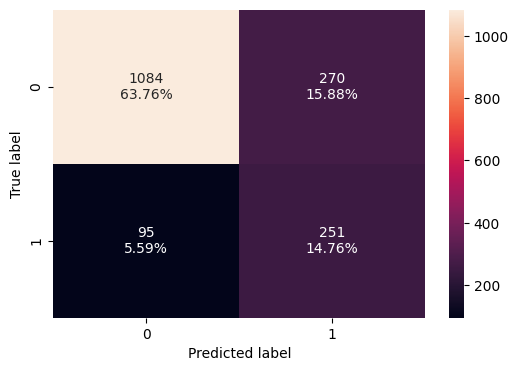

In [ ]:
# confusion matrix for validation
y_pred = model3.predict(X_val) > 0.5
make_confusion_matrix(y_val, y_pred)

## Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

#### Model 4

In [ ]:
# always clear the session before any model
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model4 = Sequential()
# input layer
model4.add(Dense(128, activation='tanh', input_dim = X_train.shape[1]))
# hidden 1
model4.add(Dense(64, activation='tanh'))
# hidden 2
model4.add(Dense(32, activation='tanh'))
# hidden 3
model4.add(Dense(16, activation='tanh'))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
model4.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['recall'])
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model4.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5576 - recall: 0.6781 - val_loss: 0.5088 - val_recall: 0.6821
Epoch 2/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4841 - recall: 0.7516 - val_loss: 0.4747 - val_recall: 0.7370
Epoch 3/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4494 - recall: 0.7896 - val_loss: 0.4632 - val_recall: 0.7630
Epoch 4/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4354 - recall: 0.8018 - val_loss: 0.4565 - val_recall: 0.7659
Epoch 5/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4252 - recall: 0.8088 - val_loss: 0.4504 - val_recall: 0.7659
Epoch 6/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4156 - recall: 0.8149 - val_loss: 0.4479 - val_recall: 0.7601
Epoch 7/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4070 - recall: 0.8168 - val_loss: 0.4469 - val_recall: 0.7572
Epoch 8/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3990 - recall: 0.8216 - val_loss: 0.4463 - val_recall: 0.7543
Epoch 9/

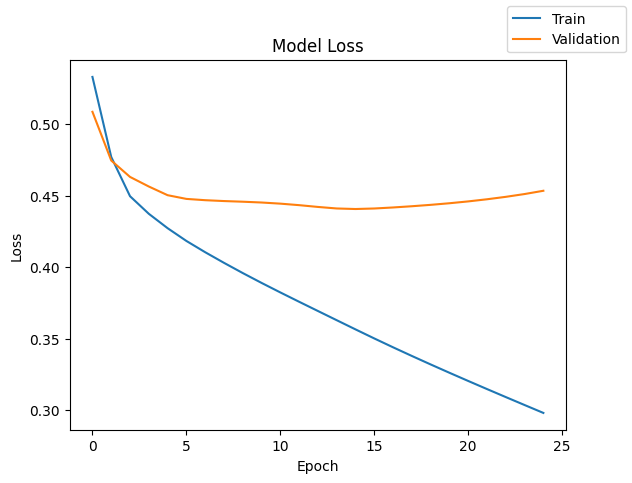

In [ ]:
plot(history,'loss')

#### Model 4 Performance

In [ ]:
# model 4 train performance Weighted
model4_train_perf = model_performance_classification(model4, X_train_smote, y_train_smote)
model4_train_perf

339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.883657,0.883657,0.884476,0.883594


In [ ]:
# mode 4 validation performance Weighted
model4_val_perf = model_performance_classification(model4, X_val, y_val)
model4_val_perf

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.798235,0.798235,0.83309,0.809888


#### Confusion Matrx

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


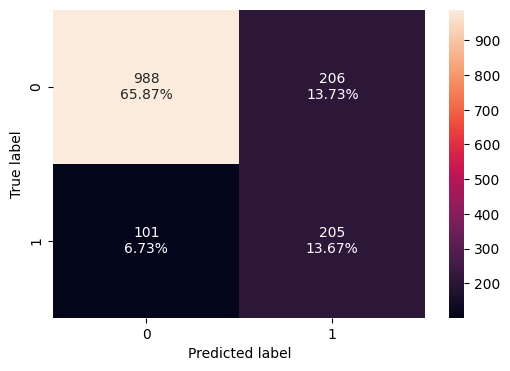

In [ ]:
# confusion matrix for test
y_pred = model4.predict(X_test) > 0.5
make_confusion_matrix(y_test, y_pred)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


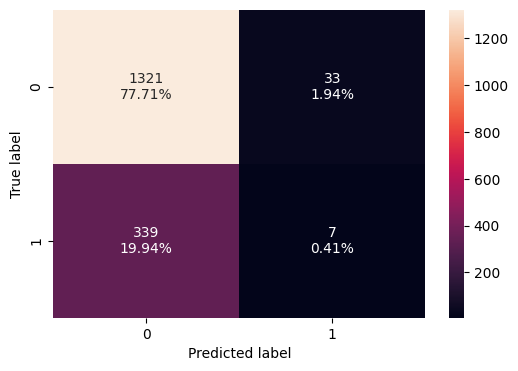

In [ ]:
# confusion matrix for validation
y_pred = model2.predict(X_val) > 0.5
make_confusion_matrix(y_val, y_pred)

## Model 5

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
# always clear the session before any model
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model5 = Sequential()
# input layer
model5.add(Dense(256, activation='tanh', input_dim = X_train.shape[1]))
model5.add(Dropout(0.1))
# hidden 1
model5.add(Dense(128, activation='tanh'))
model5.add(Dropout(0.1))
# hidden 2
model5.add(Dense(64, activation='tanh'))
model5.add(Dropout(0.1))
# hidden 3
model5.add(Dense(32, activation='tanh'))
model5.add(Dense(1, activation='sigmoid'))

In [ ]:
model5.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['recall'])
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()
history = model5.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5585 - recall: 0.6932 - val_loss: 0.4913 - val_recall: 0.6676
Epoch 2/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4856 - recall: 0.7556 - val_loss: 0.4731 - val_recall: 0.7630
Epoch 3/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4545 - recall: 0.7873 - val_loss: 0.4541 - val_recall: 0.7688
Epoch 4/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4427 - recall: 0.7990 - val_loss: 0.4444 - val_recall: 0.7601
Epoch 5/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4326 - recall: 0.7970 - val_loss: 0.4512 - val_recall: 0.7717
Epoch 6/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4259 - recall: 0.7942 - val_loss: 0.4455 - val_recall: 0.7514
Epoch 7/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4168 - recall: 0.7960 - val_loss: 0.4398 - val_recall: 0.7601
Epoch 8/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4101 - recall: 0.8024 - val_loss: 0.4397 - val_recall: 0.7543
Epoch 9/

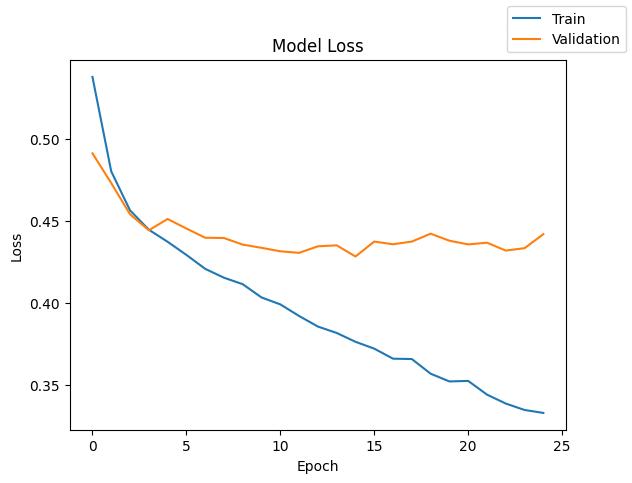

In [ ]:
plot(history,'loss')

#### Model 5 Performance

In [ ]:
# model 4 train performance Weighted
model5_train_perf = model_performance_classification(model5, X_train_smote, y_train_smote)
model5_train_perf

339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.88144,0.88144,0.881718,0.881419


In [ ]:
# mode 4 validation performance Weighted
model5_val_perf = model_performance_classification(model5, X_val, y_val)
model5_val_perf

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.798235,0.798235,0.828776,0.808915


#### Confusion Matrix

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


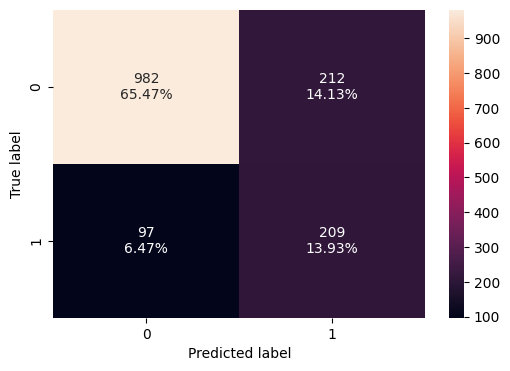

In [ ]:
# confusion matrix for test
y_pred = model5.predict(X_test) > 0.5
make_confusion_matrix(y_test, y_pred)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


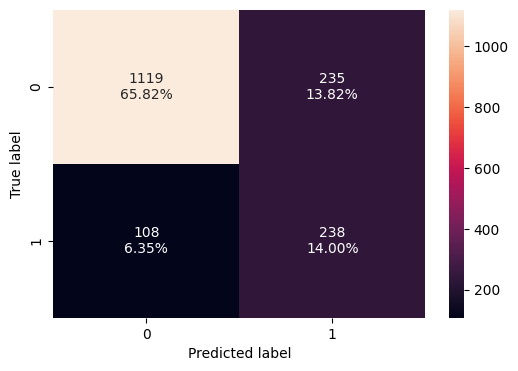

In [ ]:
# confusion matrix for val
y_pred = model5.predict(X_val) > 0.5
make_confusion_matrix(y_val, y_pred)

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model0_train_perf.T,
        model1_train_perf.T,
        model2_train_perf.T,
        model3_train_perf.T,
        model4_train_perf.T,
        model5_train_perf.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer, Dropout)",
    "Neural Network (SMOTE and SGD Optimizer)",
    "Neural Network (SMOTE and Adam Optimizer)",
    "Neural Network (SMOTE, Adam Optimizer, Dropout)",

]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model0_val_perf.T,
        model1_val_perf.T,
        model2_val_perf.T,
        model3_val_perf.T,
        model4_val_perf.T,
        model5_val_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD Optimizer)",
    "Neural Network (Adam Optimizer)",
    "Neural Network (Adam Optimizer, Dropout)",
    "Neural Network (SMOTE and SGD Optimizer)",
    "Neural Network (SMOTE and Adam Optimizer)",
    "Neural Network (SMOTE, Adam Optimizer, Dropout)",
]

In [ ]:
models_train_comp_df

,Neural Network (SGD Optimizer),Neural Network (Adam Optimizer),"Neural Network (Adam Optimizer, Dropout)",Neural Network (SMOTE and SGD Optimizer),Neural Network (SMOTE and Adam Optimizer),"Neural Network (SMOTE, Adam Optimizer, Dropout)"
Accuracy,0.798088,0.866912,0.780294,0.852262,0.883657,0.881440
Recall,0.798088,0.866912,0.780294,0.852262,0.883657,0.881440
Precision,0.749973,0.858775,0.672221,0.854891,0.884476,0.881718
F1 Score,0.728739,0.859550,0.706128,0.851988,0.883594,0.881419


In [ ]:
models_valid_comp_df

,Neural Network (SGD Optimizer),Neural Network (Adam Optimizer),"Neural Network (Adam Optimizer, Dropout)",Neural Network (SMOTE and SGD Optimizer),Neural Network (SMOTE and Adam Optimizer),"Neural Network (SMOTE, Adam Optimizer, Dropout)"
Accuracy,0.797059,0.852941,0.781176,0.785294,0.798235,0.798235
Recall,0.797059,0.852941,0.781176,0.785294,0.798235,0.798235
Precision,0.744524,0.843318,0.669436,0.830347,0.833090,0.828776
F1 Score,0.726478,0.845439,0.705549,0.799546,0.809888,0.808915


In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

Neural Network (SGD Optimizer)                     0.002260
Neural Network (Adam Optimizer)                    0.014111
Neural Network (Adam Optimizer, Dropout)           0.000579
Neural Network (SMOTE and SGD Optimizer)           0.052442
Neural Network (SMOTE and Adam Optimizer)          0.073707
Neural Network (SMOTE, Adam Optimizer, Dropout)    0.072504
Name: F1 Score, dtype: float64

**Final Model: Neural Network with Adam Optimizer**

Justification:

- The Neural Network with Adam had stable and consistent performance on both train and validation data.
- The four scoring matrices: Accuracy, Recall, Precision and F1 score were all better than the base model of predicting every customer as not churning. That score would be 80%. Every matrix beat it by 5%
- The scores are all weighted to account for the imbalance in the dataset making them conservative rather than overly optimistic.


#### Final Model

In [ ]:
# always clear the session before any model
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# instantiate the neural network
model1 = Sequential()
# input layer with 64 nodes and relu
model1.add(Dense(64, activation= 'relu', input_dim = X_train.shape[1]))
# 1st hidden layer with 32 nodes and tanh
model1.add(Dense(32, activation= 'tanh'))
# output layer with
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics= [metric])

In [ ]:
start = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5000 - recall: 0.3086 - val_loss: 0.4192 - val_recall: 0.1879
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4298 - recall: 0.2111 - val_loss: 0.4066 - val_recall: 0.2572
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4197 - recall: 0.2560 - val_loss: 0.3984 - val_recall: 0.2832
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4115 - recall: 0.2839 - val_loss: 0.3905 - val_recall: 0.3092
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4032 - recall: 0.3084 - val_loss: 0.3829 - val_recall: 0.3324
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3951 - recall: 0.3348 - val_loss: 0.3760 - val_recall: 0.3671
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3874 - recall: 0.3443 - val_loss: 0.3696 - val_recall: 0.3960
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3805 - recall: 0.3719 - val_loss: 0.3642 - val_recall: 0.4104
Epoch 9/

In [ ]:
y_train_pred = model4.predict(X_train)
y_valid_pred = model4.predict(X_val)
y_test_pred = model4.predict(X_test)

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# mode 1 test performance Weighted
model1_test_perf = model_performance_classification(model1, X_test, y_test)
model1_test_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.859333,0.859333,0.849591,0.849892


## Actionable Insights and Business Recommendations

- About 20% of all customers churn. The Bank concerned with identifying customers who may leave for another in the next 6 months can deploy this model. This model is simple and resource friendly with tested weighted recall of 86%.
- Consider better marketing strategies with a focus on customers in Germany. Germany has the highest churn rate of 32%, which is double that of other countries.
- Consider more inclusive marketing and outreach strategies as women church at a higher rate than men over all and make up the biggest group switching banks in every country included in this data.
- Credit card holding customers are less likely to churn than their counterparts, so targeted card campaigns could reduce churn rates.
- Track and reach out to inactive customers. Almost 30% of all inactive customers churn. Consider outreach campaigns.


